In [1]:
import pandas as pd
import requests
import numpy as np
import json
import tweepy

In [2]:
#create df for twitter archive
twit_arch = pd.read_csv('twitter-archive-enhanced.csv')

In [3]:
#access img predictions
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
r = requests.get(url, stream=True)

In [4]:
#create tsv for img predictions
with open('image-predictions.tsv', 'wb') as f:
    for item in r:
        f.write(item)

In [5]:
#create df for img predictions
img_pred = pd.read_csv('image-predictions.tsv', sep='\t')

In [6]:
#keys for accessing API
consumer_key = 'Z3Oz1kXvqymKJSSImppIqoDR2'
consumer_secret = 'oQPgmHnM4CnbmfbHcZKliacP6x0gyKSDJ9kde6yGOHOyhQ6RD9'

access_token = '829641247962836993-kbbUiL3mCfOic2XHDp0fJ2OtIzVrDVJ'
access_token_secret = 'Td6gHrNB6FnUtjySKqmm59fSkOHL33ggVsQ41dQPvssEh'

In [7]:
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)

In [8]:
api = tweepy.API(auth)

In [9]:
#access we rate dogs username, @dog_rates
we_rate_dogs = api.get_user('dog_rates')

In [10]:
#get all tweets and put them into a dict with retweet and like counts
retweets_likes = {}
for tw_id in twit_arch.tweet_id:
    try:
        tweet = api.get_status(tw_id)
        retweets_likes[tweet.id] = {
            'retweets' : tweet.retweet_count, 
            'likes' : tweet.favorite_count}
    except:
        retweets_likes[tw_id] = {
            'retweets' : 'None', 
            'likes' : 'None'}

In [11]:
#put dict of retweets_likes into json file
with open('tweet_json.txt', 'w') as outfile:  
    json.dump(retweets_likes, outfile)

In [12]:
#make dict into dataframe
retweets_likes = pd.DataFrame(retweets_likes)

In [13]:
#open file to make dict into dataframe
with open('tweet_json.txt', 'r') as infile:
    retweets_likes = pd.DataFrame(json.load(infile))

### To run on startup

Run when it's not necessary to recreate the files from above / to regather data. 

In [2]:
import pandas as pd
import requests
import numpy as np
import json
import tweepy

In [3]:
#create df for twitter archive
twit_arch = pd.read_csv('twitter-archive-enhanced.csv')

In [4]:
#create df for img predictions
img_pred = pd.read_csv('image-predictions.tsv', sep='\t')

In [5]:
with open('tweet_json.txt', 'r') as infile:
    retweets_likes = pd.DataFrame(json.load(infile))

### Data Assessment

In [81]:
#clean copies
retweets_likes_clean = retweets_likes.copy()
img_pred_clean = img_pred.copy()
twit_arch_clean = twit_arch.copy()

Visual Check of Data

In [82]:
twit_arch_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [83]:
twit_arch_clean.head(25)

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
0   892420643555336193                    NaN                  NaN   
1   892177421306343426                    NaN                  NaN   
2   891815181378084864                    NaN                  NaN   
3   891689557279858688                    NaN                  NaN   
4   891327558926688256                    NaN                  NaN   
5   891087950875897856                    NaN                  NaN   
6   890971913173991426                    NaN                  NaN   
7   890729181411237888                    NaN                  NaN   
8   890609185150312448                    NaN                  NaN   
9   890240255349198849                    NaN                  NaN   
10  890006608113172480                    NaN                  NaN   
11  889880896479866881                    NaN                  NaN   
12  889665388333682689                    NaN                  NaN   
13  889638837579907072                    NaN                  NaN   
14  889531135344209921                    NaN                  NaN   
15  889278841981685760                    NaN                  NaN   
16  888917238123831296                    NaN                  NaN   
17  888804989199671297                    NaN                  NaN   
18  888554962724278272                    NaN                  NaN   
19  888202515573088257                    NaN                  NaN   
20  888078434458587136                    NaN                  NaN   
21  887705289381826560                    NaN                  NaN   
22  887517139158093824                    NaN                  NaN   
23  887473957103951883                    NaN                  NaN   
24  887343217045368832                    NaN                  NaN   

                    timestamp  \
0   2017-08-01 16:23:56 +0000   
1   2017-08-01 00:17:27 +0000   
2   2017-07-31 00:18:03 +0000   
3   2017-07-30 15:58:51 +0000   
4   2017-07-29 16:00:24 +0000   
5   2017-07-29 00:08:17 +0000   
6   2017-07-28 16:27:12 +0000   
7   2017-07-28 00:22:40 +0000   
8   2017-07-27 16:25:51 +0000   
9   2017-07-26 15:59:51 +0000   
10  2017-07-26 00:31:25 +0000   
11  2017-07-25 16:11:53 +0000   
12  2017-07-25 01:55:32 +0000   
13  2017-07-25 00:10:02 +0000   
14  2017-07-24 17:02:04 +0000   
15  2017-07-24 00:19:32 +0000   
16  2017-07-23 00:22:39 +0000   
17  2017-07-22 16:56:37 +0000   
18  2017-07-22 00:23:06 +0000   
19  2017-07-21 01:02:36 +0000   
20  2017-07-20 16:49:33 +0000   
21  2017-07-19 16:06:48 +0000   
22  2017-07-19 03:39:09 +0000   
23  2017-07-19 00:47:34 +0000   
24  2017-07-18 16:08:03 +0000   

                                               source  \
0   <a href="http://twitter.com/download/iphone" r...   
1   <a href="http://twitter.com/download/iphone" r...   
2   <a href="http://twitter.com/download/iphone" r...   
3   <a href="http://twitter.com/download/iphone" r...   
4   <a href="http://twitter.com/download/iphone" r...   
5   <a href="http://twitter.com/download/iphone" r...   
6   <a href="http://twitter.com/download/iphone" r...   
7   <a href="http://twitter.com/download/iphone" r...   
8   <a href="http://twitter.com/download/iphone" r...   
9   <a href="http://twitter.com/download/iphone" r...   
10  <a href="http://twitter.com/download/iphone" r...   
11  <a href="http://twitter.com/download/iphone" r...   
12  <a href="http://twitter.com/download/iphone" r...   
13  <a href="http://twitter.com/download/iphone" r...   
14  <a href="http://twitter.com/download/iphone" r...   
15  <a href="http://twitter.com/download/iphone" r...   
16  <a href="http://twitter.com/download/iphone" r...   
17  <a href="http://twitter.com/download/iphone" r...   
18  <a href="http://twitter.com/download/iphone" r...   
19  <a href="http://twitter.com/download/iphone" r...   
20  <a href="http://twitter.com/download/iphone" r...   
21  <a href="http://twitter.com/download/iphone" r...   
22  <a href="http://twi

In [84]:
twit_arch_clean.name.value_counts()

None         745
a             55
Charlie       12
Cooper        11
Lucy          11
Oliver        11
Penny         10
Lola          10
Tucker        10
Winston        9
Bo             9
the            8
Sadie          8
Daisy          7
Toby           7
Bailey         7
Buddy          7
an             7
Stanley        6
Koda           6
Scout          6
Jax            6
Dave           6
Leo            6
Bella          6
Jack           6
Milo           6
Rusty          6
Oscar          6
Gus            5
            ... 
Tove           1
Glacier        1
Pip            1
Zoe            1
Cilantro       1
Jennifur       1
Olaf           1
Teddy          1
Socks          1
Snoop          1
Lenox          1
Jeremy         1
Zooey          1
Todo           1
Kanu           1
Ember          1
Steve          1
Laika          1
Eazy           1
Obi            1
Kane           1
Finnegus       1
Alexander      1
Meatball       1
Zara           1
Bronte         1
Edgar          1
Glenn         

- not all dogs are categorized into doggo, floofer, pupper or puppo
- some dogs are missing names, eg 'None' or 'a' or 'an'
- should combine rating numerator over denominator for easier reading
- can remove retweeted data, since it's not original (if it's a retweet, remove it) and then can remove all columns related to that for cleaner looking dataset

In [85]:
img_pred_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.0+ KB


In [86]:
img_pred_clean.head(25)

tweet_id                                          jpg_url  \
0   666020888022790149  https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg   
1   666029285002620928  https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg   
2   666033412701032449  https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg   
3   666044226329800704  https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg   
4   666049248165822465  https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg   
5   666050758794694657  https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg   
6   666051853826850816  https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg   
7   666055525042405380  https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg   
8   666057090499244032  https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg   
9   666058600524156928  https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg   
10  666063827256086533  https://pbs.twimg.com/media/CT5Vg_wXIAAXfnj.jpg   
11  666071193221509120  https://pbs.twimg.com/media/CT5cN_3WEAAlOoZ.jpg   
12  666073100786774016  https://pbs.twimg.com/media/CT5d9DZXAAALcwe.jpg   
13  666082916733198337  https://pbs.twimg.com/media/CT5m4VGWEAAtKc8.jpg   
14  666094000022159362  https://pbs.twimg.com/media/CT5w9gUW4AAsBNN.jpg   
15  666099513787052032  https://pbs.twimg.com/media/CT51-JJUEAA6hV8.jpg   
16  666102155909144576  https://pbs.twimg.com/media/CT54YGiWUAEZnoK.jpg   
17  666104133288665088  https://pbs.twimg.com/media/CT56LSZWoAAlJj2.jpg   
18  666268910803644416  https://pbs.twimg.com/media/CT8QCd1WEAADXws.jpg   
19  666273097616637952  https://pbs.twimg.com/media/CT8T1mtUwAA3aqm.jpg   
20  666287406224695296  https://pbs.twimg.com/media/CT8g3BpUEAAuFjg.jpg   
21  666293911632134144  https://pbs.twimg.com/media/CT8mx7KW4AEQu8N.jpg   
22  666337882303524864  https://pbs.twimg.com/media/CT9OwFIWEAMuRje.jpg   
23  666345417576210432  https://pbs.twimg.com/media/CT9Vn7PWoAA_ZCM.jpg   
24  666353288456101888  https://pbs.twimg.com/media/CT9cx0tUEAAhNN_.jpg   

    img_num                      p1   p1_conf  p1_dog  \
0         1  Welsh_springer_spaniel  0.465074    True   
1         1                 redbone  0.506826    True   
2         1         German_shepherd  0.596461    True   
3         1     Rhodesian_ridgeback  0.408143    True   
4         1      miniature_pinscher  0.560311    True   
5         1    Bernese_mountain_dog  0.651137    True   
6         1              box_turtle  0.933012   False   
7         1                    chow  0.692517    True   
8         1           shopping_cart  0.962465   False   
9         1        miniature_poodle  0.201493    True   
10        1        golden_retriever  0.775930    True   
11        1           Gordon_setter  0.503672    True   
12        1            Walker_hound  0.260857    True   
13        1                     pug  0.489814    True   
14        1              bloodhound  0.195217    True   
15        1                   Lhasa  0.582330    True   
16        1          English_setter  0.298617    True   
17        1                     hen  0.965932   False   
18        1        desktop_computer  0.086502   False   
19        1       Italian_greyhound  0.176053    True   
20        1             Maltese_dog  0.857531    True   
21        1        three-toed_sloth  0.914671   False   
22        1                      ox  0.416669   False   
23        1        golden_retriever  0.858744    True   
24        1                malamute  0.336874    True   

                          p2   p2_conf  p2_dog                           p3  \
0                     collie  0.156665    True            Shetland_sheepdog   
1         miniature_pinscher  0.074192    True          Rhodesian_ridgeback   
2                   malinois  0.138584    True                   bloodhound   
3                    redbone  0.360687    True           miniature_pinscher   
4                 Rottweiler  0.243682    True                     Doberman   
5           English_springer  0.263788    True   Greater_Swiss_Mountain_dog   
6                 mud_turtl

- can combine this dataset with the other- if tweet id's match, can add guess if it's above a certain score

In [87]:
retweets_likes_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2 entries, likes to retweets
Columns: 2356 entries, 666020888022790149 to 892420643555336193
dtypes: int64(1789), object(567)
memory usage: 36.8+ KB


In [88]:
retweets_likes_clean.head()

666020888022790149 666029285002620928 666033412701032449  \
likes                  None               None               None   
retweets               None               None               None   

         666044226329800704 666049248165822465 666050758794694657  \
likes                  None               None               None   
retweets               None               None               None   

         666051853826850816 666055525042405380 666057090499244032  \
likes                  None               None               None   
retweets               None               None               None   

         666058600524156928        ...         890240255349198849  \
likes                  None        ...                      32092   
retweets               None        ...                       7529   

         890609185150312448 890729181411237888 890971913173991426  \
likes                 27898              65879              11912   
retweets               4323              19172               2105   

         891087950875897856 891327558926688256 891689557279858688  \
likes                 20318              40496              42340   
retweets               3160               9530               8764   

         891815181378084864 892177421306343426 892420643555336193  
likes                 25159              33388              38984  
retweets               4216               6355               8650  

[2 rows x 2356 columns]

- need to transpose dataset
- can combine this with other dataset

### Quality Issues

twit_arch

- X Change timestamp data type into datetime (from object) in twit_arch_clean
- X Erase useless columns (source)
- X delete dogs with no names (unlikely that there's a rating)
- X Remove tweets that are replies
- X Remove tweets that are retweets
- join rating numerator and denominator

img_pred

- X only include column of id, link, and best guess
- X add to twit_arch

retweets_likes
- X Switch retweets and likes columns & rows (transpose)
- X add column header for tweet id
- X add columns to twit_arch, match by tweet id
- X put 0 instead of None for likes / retweets

all
- X make tweet_id into ints 

### Tidiness Issues:

twit_arch

X transpose retweets_likes dataframe
X Combine doggo, floofer, puppo and pupper into one column
- Combine ratings into one column and make into a string

### Tidiness Issues & Testing

In [89]:
#transpose retweets_likes so columns are retweets & likes, rows are tweet IDs
retweets_likes_clean = retweets_likes_clean.transpose()

In [90]:
#test retweets_likes
retweets_likes_clean.sample(10)

likes retweets
703425003149250560   4091     1527
747963614829678593   None     None
771770456517009408  13124     3822
706681918348251136   None     None
751793661361422336   None     None
749774190421639168   None     None
668960084974809088    740      252
692423280028966913   1588      255
778624900596654080   5093     1141
693942351086120961   1860      407

### Quality Issues & Testing

In [91]:
#Change timestamp data type into datetime (from object) in twit_arch_clean
twit_arch_clean.timestamp = pd.to_datetime(twit_arch_clean.timestamp)

In [92]:
#testing for datetime
twit_arch_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null datetime64[ns]
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: datetime64[ns](1

##### BACK TO TIDY ISSUES!! 

In [93]:
#reset retweets_likes_clean index
retweets_likes_clean = retweets_likes_clean.reset_index()

In [94]:
#rename column headers to match twit_arch_clean
retweets_likes_clean.columns = ['tweet_id', 'likes', 'retweets']

In [96]:
retweets_likes_clean.sample(10)

tweet_id  likes retweets
456   674670581682434048   1703      704
898   695095422348574720   2830      675
1118  712309440758808576   None     None
1330  746369468511756288   None     None
691   682788441537560576   2657     1236
102   667793409583771648    721      347
536   676590572941893632    975      139
1536  770655142660169732   8000     1967
172   668989615043424256    711      346
2078  840370681858686976  17633     5033

In [97]:
#make tweet_id, retweets, and likes into ints; replace None with 0
retweets_likes_clean = retweets_likes_clean.replace(to_replace='None', value=0)

In [98]:
retweets_likes_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 3 columns):
tweet_id    2356 non-null object
likes       2356 non-null int64
retweets    2356 non-null int64
dtypes: int64(2), object(1)
memory usage: 55.3+ KB


In [99]:
#Combine twit_arch with retweets_likes
twit_arch_clean = pd.merge(twit_arch_clean, retweets_likes_clean,
                            on=['tweet_id'], how='left')

In [100]:
twit_arch_clean.head()

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
0  892420643555336193                    NaN                  NaN   
1  892177421306343426                    NaN                  NaN   
2  891815181378084864                    NaN                  NaN   
3  891689557279858688                    NaN                  NaN   
4  891327558926688256                    NaN                  NaN   

            timestamp                                             source  \
0 2017-08-01 16:23:56  <a href="http://twitter.com/download/iphone" r...   
1 2017-08-01 00:17:27  <a href="http://twitter.com/download/iphone" r...   
2 2017-07-31 00:18:03  <a href="http://twitter.com/download/iphone" r...   
3 2017-07-30 15:58:51  <a href="http://twitter.com/download/iphone" r...   
4 2017-07-29 16:00:24  <a href="http://twitter.com/download/iphone" r...   

                                                text  retweeted_status_id  \
0  This is Phineas. He's a mystical boy. Only eve...                  NaN   
1  This is Tilly. She's just checking pup on you....                  NaN   
2  This is Archie. He is a rare Norwegian Pouncin...                  NaN   
3  This is Darla. She commenced a snooze mid meal...                  NaN   
4  This is Franklin. He would like you to stop ca...                  NaN   

   retweeted_status_user_id retweeted_status_timestamp  \
0                       NaN                        NaN   
1                       NaN                        NaN   
2                       NaN                        NaN   
3                       NaN                        NaN   
4                       NaN                        NaN   

                                       expanded_urls  rating_numerator  \
0  https://twitter.com/dog_rates/status/892420643...                13   
1  https://twitter.com/dog_rates/status/892177421...                13   
2  https://twitter.com/dog_rates/status/891815181...                12   
3  https://twitter.com/dog_rates/status/891689557...                13   
4  https://twitter.com/dog_rates/status/891327558...                12   

   rating_denominator      name doggo floofer pupper puppo  likes  retweets  
0                  10   Phineas  None    None   None  None    NaN       NaN  
1                  10     Tilly  None    None   None  None    NaN       NaN  
2                  10    Archie  None    None   None  None    NaN       NaN  
3                  10     Darla  None    None   None  None    NaN       NaN  
4                  10  Franklin  None    None   None  None    NaN       NaN

### Quality, Round 2

In [101]:
#Check for tweets that are replies, and delete
twit_arch_clean.in_reply_to_status_id = twit_arch_clean.in_reply_to_status_id.notnull()

twit_arch_clean = twit_arch_clean[twit_arch_clean.in_reply_to_status_id != True]

In [102]:
#check (using user_id) that there are no values besides null listed
twit_arch_clean.in_reply_to_user_id.value_counts()

Series([], Name: in_reply_to_user_id, dtype: int64)

In [103]:
#drop both columns
twit_arch_clean = twit_arch_clean.drop('in_reply_to_user_id', axis=1)

twit_arch_clean = twit_arch_clean.drop('in_reply_to_status_id', axis=1)

In [104]:
#make sure the columns are gone
twit_arch_clean.head()

tweet_id           timestamp  \
0  892420643555336193 2017-08-01 16:23:56   
1  892177421306343426 2017-08-01 00:17:27   
2  891815181378084864 2017-07-31 00:18:03   
3  891689557279858688 2017-07-30 15:58:51   
4  891327558926688256 2017-07-29 16:00:24   

                                              source  \
0  <a href="http://twitter.com/download/iphone" r...   
1  <a href="http://twitter.com/download/iphone" r...   
2  <a href="http://twitter.com/download/iphone" r...   
3  <a href="http://twitter.com/download/iphone" r...   
4  <a href="http://twitter.com/download/iphone" r...   

                                                text  retweeted_status_id  \
0  This is Phineas. He's a mystical boy. Only eve...                  NaN   
1  This is Tilly. She's just checking pup on you....                  NaN   
2  This is Archie. He is a rare Norwegian Pouncin...                  NaN   
3  This is Darla. She commenced a snooze mid meal...                  NaN   
4  This is Franklin. He would like you to stop ca...                  NaN   

   retweeted_status_user_id retweeted_status_timestamp  \
0                       NaN                        NaN   
1                       NaN                        NaN   
2                       NaN                        NaN   
3                       NaN                        NaN   
4                       NaN                        NaN   

                                       expanded_urls  rating_numerator  \
0  https://twitter.com/dog_rates/status/892420643...                13   
1  https://twitter.com/dog_rates/status/892177421...                13   
2  https://twitter.com/dog_rates/status/891815181...                12   
3  https://twitter.com/dog_rates/status/891689557...                13   
4  https://twitter.com/dog_rates/status/891327558...                12   

   rating_denominator      name doggo floofer pupper puppo  likes  retweets  
0                  10   Phineas  None    None   None  None    NaN       NaN  
1                  10     Tilly  None    None   None  None    NaN       NaN  
2                  10    Archie  None    None   None  None    NaN       NaN  
3                  10     Darla  None    None   None  None    NaN       NaN  
4                  10  Franklin  None    None   None  None    NaN       NaN

In [105]:
#Check for tweets that are retweets, and delete
twit_arch_clean.retweeted_status_id = twit_arch_clean.retweeted_status_id.notnull()

twit_arch_clean = twit_arch_clean[twit_arch_clean.retweeted_status_id != True]

In [106]:
#check (using user_id) that there are no values besides null listed
twit_arch_clean.retweeted_status_user_id.value_counts()

Series([], Name: retweeted_status_user_id, dtype: int64)

In [107]:
#drop all retweet columns
twit_arch_clean = twit_arch_clean.drop('retweeted_status_id', axis=1)

twit_arch_clean = twit_arch_clean.drop('retweeted_status_user_id', axis=1)

twit_arch_clean = twit_arch_clean.drop('retweeted_status_timestamp', axis=1)

In [112]:
#make sure the columns are gone
twit_arch_clean.sample()

tweet_id           timestamp  \
1147  726935089318363137 2016-05-02 00:43:25   

                                                   text  \
1147  This is Sprout. He's just precious af. 12/10 I...   

                                          expanded_urls  rating_numerator  \
1147  https://twitter.com/dog_rates/status/726935089...                12   

      rating_denominator    name doggo floofer pupper puppo  likes  retweets  
1147                  10  Sprout  None    None   None  None    NaN       NaN

In [109]:
#Erase source column- it's not used for our purposes
twit_arch_clean= twit_arch_clean.drop('source', axis=1)

In [111]:
#test to make sure it's done
twit_arch_clean.sample()

tweet_id           timestamp  \
1674  682259524040966145 2015-12-30 17:58:40   

                                                   text  \
1674  Meet Jax. He's an Iglesias Hufflepoof. Quite t...   

                                          expanded_urls  rating_numerator  \
1674  https://twitter.com/dog_rates/status/682259524...                 9   

      rating_denominator name doggo floofer pupper puppo  likes  retweets  
1674                  10  Jax  None    None   None  None    NaN       NaN

In [113]:
#Combine dog category columns (doggo, floofer, pupper, puppo) into one column
twit_arch_clean = pd.melt(twit_arch_clean, id_vars=['tweet_id', 'timestamp', 'text', 'expanded_urls',
                                                    'rating_numerator', 'rating_denominator', 'name', 'likes', 'retweets'], 
                          value_vars=['floofer', 'pupper', 'puppo', 'doggo'], 
                         var_name='dog_type')

In [114]:
#test to see dog values
twit_arch_clean.sample(10)

tweet_id           timestamp  \
3667  676864501615042560 2015-12-15 20:40:47   
1035  710833117892898816 2016-03-18 14:19:56   
2082  666094000022159362 2015-11-16 03:22:39   
7975  674014384960745472 2015-12-07 23:55:26   
2398  827324948884643840 2017-02-03 01:16:53   
2914  745422732645535745 2016-06-22 01:06:43   
5699  679405845277462528 2015-12-22 20:59:10   
910   729854734790754305 2016-05-10 02:05:03   
3368  692158366030913536 2016-01-27 01:33:08   
7466  699775878809702401 2016-02-17 02:02:25   

                                                   text  \
3667  Meet Ash. He's just a head now. Lost his body ...   
1035  Say hello to Sora. She's an Egyptian Pumpernic...   
2082  This appears to be a Mongolian Presbyterian mi...   
7975  Say hello to Aiden. His eyes are magical. Love...   
2398  This is Ralphie. He's being treated for an ove...   
2914  We only rate dogs. Pls stop sending in non-can...   
5699  Crazy unseen footage from Jurassic Park. 10/10...   
910   Say hello to Ollie. He conducts this train. He...   
3368  This is Edgar. He's a Sassafras Puggleflash. N...   
7466  Meet Fillup. Spaghetti is his main weakness. A...   

                                          expanded_urls  rating_numerator  \
3667  https://twitter.com/dog_rates/status/676864501...                10   
1035  https://twitter.com/dog_rates/status/710833117...                12   
2082  https://twitter.com/dog_rates/status/666094000...                 9   
7975  https://twitter.com/dog_rates/status/674014384...                11   
2398  https://twitter.com/dog_rates/status/827324948...                12   
2914  https://twitter.com/dog_rates/status/745422732...                 9   
5699                      https://vine.co/v/iKVFEigMLxP                10   
910   https://twitter.com/dog_rates/status/729854734...                11   
3368  https://twitter.com/dog_rates/status/692158366...                10   
7466  https://twitter.com/dog_rates/status/699775878...                11   

      rating_denominator     name  likes  retweets dog_type value  
3667                  10      Ash    NaN       NaN   pupper  None  
1035                  10     Sora    NaN       NaN  floofer  None  
2082                  10     None    NaN       NaN  floofer  None  
7975                  10    Aiden    NaN       NaN    doggo  None  
2398                  10  Ralphie    NaN       NaN   pupper  None  
2914                  10     very    NaN       NaN   pupper  None  
5699                  10     None    NaN       NaN    puppo  None  
910                   10    Ollie    NaN       NaN  floofer  None  
3368                  10    Edgar    NaN       NaN   pupper  None  
7466                  10   Fillup    NaN       NaN    doggo  None

In [115]:
#delete dogs with no names ('None' and 'a')
twit_arch_clean = twit_arch_clean[twit_arch_clean.name != 'None']
twit_arch_clean = twit_arch_clean[twit_arch_clean.name != 'a']

In [116]:
twit_arch_clean.name.value_counts()

Charlie     44
Lucy        44
Oliver      40
Cooper      40
Tucker      36
Penny       36
Sadie       32
Lola        32
Winston     32
the         32
Toby        28
Daisy       28
Stanley     24
an          24
Bo          24
Jax         24
Bailey      24
Bella       24
Koda        24
Oscar       24
Rusty       20
Bentley     20
Leo         20
Buddy       20
Milo        20
Dave        20
Louis       20
Chester     20
Scout       20
Chip        16
            ..
Suki         4
Creg         4
Stubert      4
Maisey       4
Bronte       4
Meatball     4
Clyde        4
Finnegus     4
Livvie       4
Brudge       4
Lili         4
Grizzie      4
Mollie       4
Teddy        4
Snoop        4
Lenox        4
Jeremy       4
Philbert     4
Zooey        4
Todo         4
Kanu         4
Dawn         4
Ember        4
Steve        4
Laika        4
Socks        4
Eazy         4
Kane         4
Moreton      4
Opie         4
Name: name, Length: 953, dtype: int64

In [117]:
#delete extra columns in img_pred
img_pred_clean = img_pred_clean.drop('p2', axis=1)
img_pred_clean = img_pred_clean.drop('p2_conf', axis=1)
img_pred_clean = img_pred_clean.drop('p2_dog', axis=1)
img_pred_clean = img_pred_clean.drop('p3', axis=1)
img_pred_clean = img_pred_clean.drop('p3_conf', axis=1)
img_pred_clean = img_pred_clean.drop('p3_dog', axis=1)

In [118]:
img_pred_clean = img_pred_clean.drop('img_num', axis=1)

In [119]:
img_pred_clean.sample()

tweet_id                                          jpg_url  \
599  679729593985699840  https://pbs.twimg.com/media/CW7iddWUsAElUC0.jpg   

          p1   p1_conf  p1_dog  
599  wallaby  0.164215   False

In [120]:
#Combine twit_arch with img_pred
twit_arch_clean = pd.merge(twit_arch_clean, img_pred_clean,
                            on=['tweet_id'], how='left')

In [122]:
twit_arch_clean.sample()

tweet_id           timestamp  \
458  777621514455814149 2016-09-18 21:33:11   

                                                  text  \
458  This is Derek. You can't look at him and not s...   

                                         expanded_urls  rating_numerator  \
458  https://twitter.com/dog_rates/status/777621514...                12   

     rating_denominator   name  likes  retweets dog_type value  \
458                  10  Derek    NaN       NaN  floofer  None   

                                             jpg_url    p1   p1_conf p1_dog  
458  https://pbs.twimg.com/media/Csqqoo5WEAAMTVW.jpg  chow  0.999823   True

In [123]:
#make numerator and denominator columns into a string
twit_arch_clean.rating_numerator = twit_arch_clean.rating_numerator.astype(str)

twit_arch_clean.rating_denominator = twit_arch_clean.rating_denominator.astype(str)

In [124]:
#combine numerator and denominator 
twit_arch_clean['rating'] = twit_arch_clean.rating_numerator + '/' + twit_arch_clean.rating_denominator

In [125]:
twit_arch_clean.sample()

tweet_id           timestamp  \
3454  751830394383790080 2016-07-09 17:28:29   

                                                   text  \
3454  This is Tucker. He's very camera shy. 12/10 wo...   

                                          expanded_urls rating_numerator  \
3454  https://twitter.com/dog_rates/status/751830394...               12   

     rating_denominator    name  likes  retweets dog_type value  \
3454                 10  Tucker    NaN       NaN    puppo  None   

                                              jpg_url    p1   p1_conf p1_dog  \
3454  https://pbs.twimg.com/media/Cm8JwBqW8AAFOEn.jpg  chow  0.703569   True   

     rating  
3454  12/10

In [126]:
twit_arch_clean = twit_arch_clean.drop('rating_denominator', axis=1)
twit_arch_clean = twit_arch_clean.drop('rating_numerator', axis=1)

In [129]:
twit_arch_clean.sample(10)

tweet_id           timestamp  \
2957  869702957897576449 2017-05-30 23:51:58   
2435  687109925361856513 2016-01-13 03:12:26   
1473  882992080364220416 2017-07-06 15:58:11   
3738  702332542343577600 2016-02-24 03:21:41   
749   716439118184652801 2016-04-03 01:36:11   
4979  738885046782832640 2016-06-04 00:08:17   
3071  833826103416520705 2017-02-20 23:50:09   
3587  725842289046749185 2016-04-29 00:21:01   
338   802952499103731712 2016-11-27 19:09:28   
1601  841680585030541313 2017-03-14 16:01:03   

                                                   text  \
2957  Meet Stanley. He likes road trips. Will shift ...   
2435  This is Baxter. He looks like a fun dog. Prefe...   
1473  This is Rusty. He wasn't ready for the first p...   
3738  This is Rudy. He's going to be a star. 13/10 t...   
749   This is Bluebert. He just saw that both #Final...   
4979  This is Charles. He's a Nova Scotian Towel Pou...   
3071  Meet Charlie. She asked u to change the channe...   
3587  This is Colby. He's currently regretting all t...   
338   This is Marley. She's having a ruff day. Prett...   
1601  This is Penny. She's a dragon slayer. Feared b...   

                                          expanded_urls      name  likes  \
2957  https://twitter.com/dog_rates/status/869702957...   Stanley    NaN   
2435  https://twitter.com/dog_rates/status/687109925...    Baxter    NaN   
1473  https://twitter.com/dog_rates/status/882992080...     Rusty    NaN   
3738                      https://vine.co/v/irlDujgwOjd      Rudy    NaN   
749   https://twitter.com/dog_rates/status/716439118...  Bluebert    NaN   
4979  https://twitter.com/dog_rates/status/738885046...   Charles    NaN   
3071  https://twitter.com/dog_rates/status/833826103...   Charlie    NaN   
3587  https://twitter.com/dog_rates/status/725842289...     Colby    NaN   
338   https://twitter.com/dog_rates/status/802952499...    Marley    NaN   
1601  https://twitter.com/dog_rates/status/841680585...     Penny    NaN   

      retweets dog_type value  \
2957       NaN    puppo  None   
2435       NaN   pupper  None   
1473       NaN   pupper  None   
3738       NaN    puppo  None   
749        NaN  floofer  None   
4979       NaN    doggo  None   
3071       NaN    puppo  None   
3587       NaN    puppo  None   
338        NaN  floofer  None   
1601       NaN   pupper  None   

                                              jpg_url              p1  \
2957  https://pbs.twimg.com/media/DBHOOfOXoAABKlU.jpg        Pembroke   
2435  https://pbs.twimg.com/media/CYka1NTWMAAOclP.jpg          borzoi   
1473  https://pbs.twimg.com/media/DEEEnIqXYAAiJh_.jpg      Eskimo_dog   
3738                                              NaN             NaN   
749   https://pbs.twimg.com/media/CfFNk7cWAAA-hND.jpg  Siberian_husky   
4979  https://pbs.twimg.com/media/CkEMBz9WYAAGLaa.jpg      bath_towel   
3071  https://pbs.twimg.com/media/C5JYaYoVYAAcEQw.jpg       Chihuahua   
3587  https://pbs.twimg.com/media/ChK1tdBWwAQ1flD.jpg      toy_poodle   
338   https://pbs.twimg.com/media/CySpCSHXcAAN-qC.jpg            chow   
1601  https://pbs.twimg.com/media/C65AA7_WoAEGqA9.jpg       Chihuahua   

       p1_conf p1_dog rating  
2957  0.993449   True  13/10  
2435  0.883086   True  11/10  
1473  0.466778   True  13/10  
3738       NaN    NaN  13/10  
749   0.396495   True  50/50  
4979  0.878320  False  11/10  
3071  0.438054   True  13/10  
3587  0.420463   True  12/10  
338   0.944032   True  12/10  
1601  0.547401   True  12/10

In [169]:
import matplotlib.pyplot as plt
import numpy as np

In [170]:
x = twit_arch_clean.p1
y = twit_arch_clean.rating

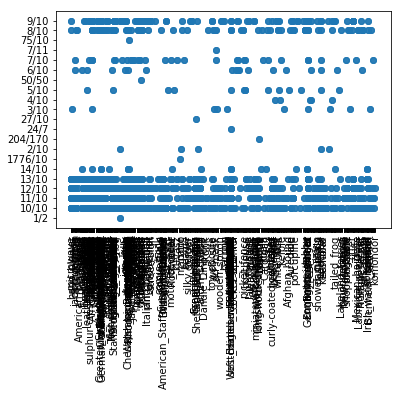

In [180]:
plt.scatter(x, y, alpha=0.5)
plt.xticks(x, rotation='vertical')
plt.figure(figsize=(1,1))
plt.show()

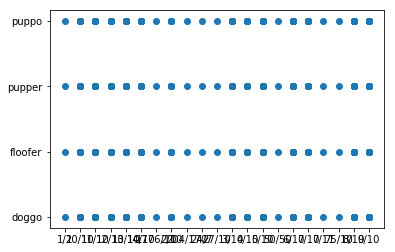

In [182]:
plt.scatter(twit_arch_clean.rating, twit_arch_clean.dog_type)
plt.figure(figsize=(100,50))
plt.show()